# <center>Statistical Thinking in Python Part II</center>

[Data Camp Link](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2)

[Chapter 1: Parameter estimation by optimization](#Chapter-1:-Parameter-estimation-by-optimization) <br>
[Chapter 2: Bootstrap confidence intervals](#Chapter-2:-Bootstrap-confidence-intervals) <br>
[Chapter 3: Introduction to hypothesis testing](#Chapter-3:-Introduction-to-hypothesis-testing) <br>
[Chapter 4: Hypothesis test examples](#Chapter-4:-Hypothesis-test-examples) <br>
[Chapter 5: Putting it all together: a case study](#Chapter-5:-Putting-it-all-together:-a-case-study)

In [1]:
# all key imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set the style for default
sns.set()

# Chapter 1: Parameter estimation by optimization

### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call $τ$, the typical interval time. The value of the parameter $τ$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the $τ$ you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as `np`, `pd`, `plt`, and `sns`, respectively.

#### Instructions

- Seed the random number generator with `42`.
- Compute the mean time (in units of number of games) between no-hitters.
- Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
- Plot the theoretical PDF using `plt.hist()`. Remember to use keyword arguments `bins=50`, `normed=True`, and `histtype='step'`. Be sure to label your axes.
- Show your plot.

In [2]:
# first import the dataset
no_hitters = pd.read_csv('data/mlb_nohitters.csv', parse_dates=[0], index_col = 'date')
no_hitters.head(2)

,game_number,winning_team,losing_team,winning_pitcher
date,,,,
1876-07-15,140,NaN,NaN,NaN
1880-06-12,1035,NaN,NaN,NaN


In [3]:
# see the variables types
no_hitters.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 1876-07-15 to 2015-10-03
Data columns (total 4 columns):
game_number        294 non-null int64
winning_team       228 non-null object
losing_team        228 non-null object
winning_pitcher    228 non-null object
dtypes: int64(1), object(3)
memory usage: 11.5+ KB


In [4]:
# question asks between 1901-2015
cut = no_hitters.loc[no_hitters.index.year >= 1900]['game_number']

In [5]:
# to see how many games played between no-hitters,
# simply subtract game_number from previous game_number
final = cut.diff()-1
final.head(2)

date
1900-07-12      NaN
1901-07-15    843.0
Name: game_number, dtype: float64

In [6]:
# convert it to NumPy array and integer
nohitter_times = final[1:].to_numpy().astype(int)

# see first couple to make sure
nohitter_times[:4]

array([ 843, 1613, 1101,  215])

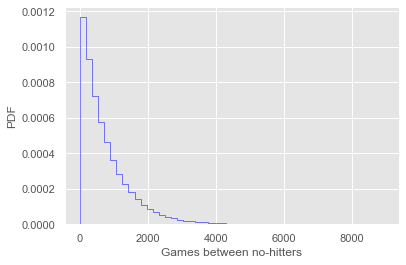

In [7]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# change it to ggplot
plt.style.use('ggplot')

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step', color='blue')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

----

### Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the [function you created in the previous course](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12) to compute the ECDF, as well as the code you wrote to [plot it](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=13).

#### Instructions

- Compute an ECDF from the actual time between no-hitters (`nohitter_times`). Use the `ecdf()` function you wrote in the prequel course.
- Create a CDF from the theoretical samples you took in the last exercise (`inter_nohitter_time`).
- Plot `x_theor` and `y_theor` as a line using `plt.plot()`. Then overlay the ECDF of the real data `x` and `y` as points. To do this, you have to specify the keyword arguments `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` inside `plt.plot()`.
- Set a 2% margin on the plot.
- Show the plot.

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

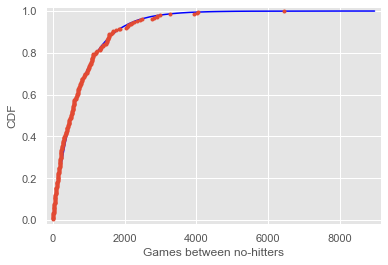

In [9]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor, color='blue')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was. Notice that theoretical CDF from samples are colored as <font color='blue'>blue</font>.

----

### How is this parameter optimal?

Now sample out of an exponential distribution with $τ$ being twice as large as the optimal $τ$. Do it again for $τ$ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the $τ$ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

*Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.*

#### Instructions

- Take `10000` samples out of an Exponential distribution with parameter $τ_{1/2}$ = `tau/2`.
- Take `10000` samples out of an Exponential distribution with parameter $τ_{2}$ = `2*tau`.
- Generate CDFs from these two sets of samples using your `ecdf()` function.
- Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

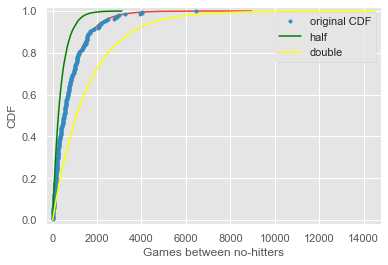

In [10]:
# Seed random number generator
np.random.seed(42)

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', label='original CDF')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, label='half', color='green')
_ = plt.plot(x_double, y_double, label='double', color='yellow')

plt.legend(loc='upper right')

# Show the plot
plt.show()

Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

----

### EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

Here, it may be useful to refer back to the [function you wrote in the previous course](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15) to compute the Pearson correlation coefficient.

#### Instructions

- Plot `fertility` (y-axis) versus `illiteracy` (x-axis) as a scatter plot.
- Set a 2% margin.
- Compute and print the Pearson correlation coefficient between `illiteracy` and `fertility`.

In [11]:
# define pearson_r function that we have defined
# in previous course
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [12]:
# import the dataset
data = pd.read_csv('data/female_literacy_fertility.csv')
data.head(2)

,Country,Continent,female_literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"


In [13]:
# get the arrays
illiteracy = (100 - data['female_literacy']).to_numpy() # convert into illiteracy and NumPy array
fertility = data['fertility'].to_numpy()

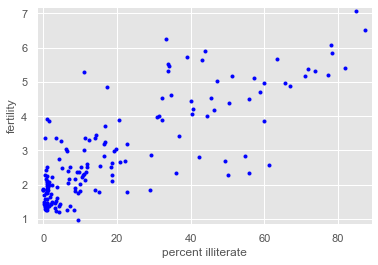

0.8041324026815345


In [14]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none', color='blue')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between `illiteracy` and `fertility` by eye, and by the substantial **Pearson correlation** coefficient of `0.8`. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

----

### Linear regression

We will assume that fertility ($y$) is a linear function of the female illiteracy rate ($x$). That is, $f=ai+b$, where $a$ is the slope and $b$ is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

#### Instructions

- Compute the slope and intercept of the regression line using `np.polyfit()`. Remember, `fertility` is on the y-axis and `illiteracy` on the x-axis.
- Print out the slope and intercept from the linear regression.
- To plot the best fit line, create an array `x` that consists of 0 and 100 using `np.array()`. Then, compute the theoretical values of `y` based on your regression parameters. I.e., `y = a * x + b`.
- Plot the data and the regression line on the same plot. Be sure to label your axes.
- Hit 'Submit Answer' to display your plot.

slope = 0.04979854809063416 children per woman / percent illiterate
intercept = 1.8880506106365564 children per woman


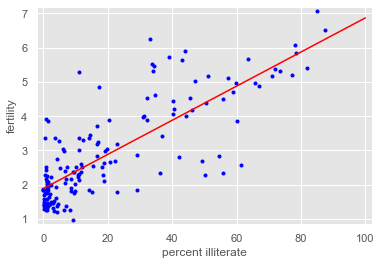

In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none', color='blue')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1) # degree 1 polynomial

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b # write the equation

# Add regression line to your plot
_ = plt.plot(x, y, color='red')

# Draw the plot
plt.show()

----

### How is it optimal?

The function `np.polyfit()` that you used to get your regression parameters finds the *optimal* slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

#### Instructions

- Specify the values of the slope to compute the RSS. Use `np.linspace()` to get `200` points in the range between `0` and `0.1`. For example, to get `100` points in the range between `0` and `0.5`, you could use `np.linspace()` like so: `np.linspace(0, 0.5, 100)`.
- Initialize an array, `rss`, to contain the RSS using `np.empty_like()` and the array you created above. The `empty_like()` function returns a new array with the same shape and type as a given array (in this case, `a_vals`).
- Write a `for` loop to compute the sum of RSS of the slope. *Hint*: the RSS is given by `np.sum((y_data - a * x_data - b)**2)`. The variable `b` you computed in the last exercise is already in your namespace. Here, `fertility` is the `y_data` and `illiteracy` the `x_data`.
- Plot the RSS (`rss`) versus slope (`a_vals`).
- Hit 'Submit Answer' to see the plot!

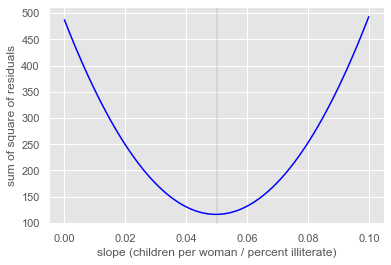

In [16]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-', color='blue')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

# index of minimum value of RSS
min_rss = np.argmin(rss)

# annotate the minimum y value on the plot
plt.axvspan(a_vals[min_rss], a_vals[min_rss]+0.0005, facecolor='g', alpha=0.5)

# show the plot
plt.show()

To be able to annotate `min(y)` value on the plot. 

1) Get the index of minimum `y` value, which is `rss` variable using `np.argmin(y)`. <br>
2) Cast that index number to x to get the x value where the y is minimum. e.g. `x[min_rss]`

----

### Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

#### Instructions

- Compute the parameters for the slope and intercept using `np.polyfit()`. The Anscombe data are stored in the arrays `x` and `y`.
- Print the slope `a` and intercept `b`.
- Generate theoretical $x$ and $y$ data from the linear regression. Your $x$ array, which you can create with `np.array()`, should consist of `3` and `15`. To generate the $y$ data, multiply the slope by `x_theor` and add the intercept.
- Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the `marker='.'` and `linestyle='none'` keyword arguments in addition to `x` and `y` when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.
- Hit 'Submit Answer' to see the plot!

In [17]:
# import the dataset
# the columns are multi-index be careful on that.
anscombe = pd.read_csv('data/anscombe.csv', header=[0,1])
anscombe.head(2)

0           1           2          3      
      x     y     x     y     x     y    x     y
0  10.0  8.04  10.0  9.14  10.0  7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0  6.77  8.0  5.76

In [18]:
# prepare arrays, notice the MultiIndex
# then convert them into NumPy array
x = anscombe.loc[:, '0']['x'].to_numpy()
y = anscombe.loc[:, '0']['y'].to_numpy()

The slope is 		 0.5000909090909091 
The intercept is 	 3.000090909090908


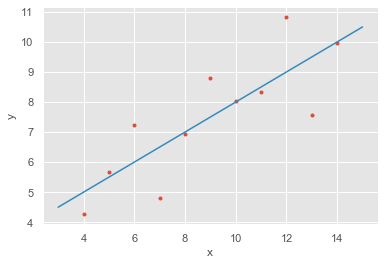

In [19]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y, 1)

# Print the slope and intercept
print('The slope is \t\t', a, '\nThe intercept is \t', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

----

### Linear regression on all Anscombe data

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, `x2` and `y2` are the $x$ and $y$ values for the second Anscombe data set.

#### Instructions

- Write a `for` loop to do the following for each Anscombe data set.
    - Compute the slope and intercept.
    - Print the slope and intercept.

In [20]:
# prepare that lists of arrays with a for loop
anscombe.head(2)

0           1           2          3      
      x     y     x     y     x     y    x     y
0  10.0  8.04  10.0  9.14  10.0  7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0  6.77  8.0  5.76

In [21]:
# create empty lists to populate
anscombe_x = []
anscombe_y = []

# create for loop to pull the arrays
for i in range(4):
    anscombe_x.append(anscombe.loc[:, pd.IndexSlice[str(i), 'x']].to_numpy())
    anscombe_y.append(anscombe.loc[:, pd.IndexSlice[str(i), 'y']].to_numpy())

<div class="alert alert-block alert-info">
<b>Note:</b> 

For `MultiIndex` columns, you can use `pd.IndexSlice` slicer to do index-slicing. Remember, those outer index are `str` objects rather than `int` 0. Therefore, use `str(i)` in the slicing.
</div>

In [22]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.4999999999999999 intercept: 3.000909090909089
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.49990909090909097 intercept: 3.0017272727272717


Indeed, they all have the same slope and intercept.

----

# Chapter 2: Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. This chapter will introduce you to this extraordinarily powerful tool.

### Getting the terminology down

Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with $n$ repeated measurements, a **bootstrap sample** is an array of length n that was drawn from the original data with replacement. What is a **bootstrap replicate**?

#### Possible Answers:

- Just another name for a bootstrap sample.
- **A single value of a statistic computed from a bootstrap sample.**
- An actual repeat of the measurements.

----

### Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array `rainfall` in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

#### Instructions

- Write a `for` loop to acquire `50` bootstrap samples of the rainfall data and plot their ECDF.
    - Use `np.random.choice()` to generate a bootstrap sample from the NumPy array `rainfall`. Be sure that the `size` of the resampled array is `len(rainfall)`.
    - Use the function `ecdf()` that you wrote in the prequel to this course to generate the `x` and `y` values for the ECDF of the bootstrap sample `bs_sample`.
    - Plot the ECDF values. Specify `color='gray'` (to make gray dots) and `alpha=0.1` (to make them semi-transparent, since we are overlaying so many) in addition to the `marker='.'` and `linestyle='none'` keyword arguments.
- Use `ecdf()` to generate `x` and `y` values for the ECDF of the original rainfall data available in the array `rainfall`.
- Plot the ECDF values of the original data.
- Hit 'Submit Answer' to visualize the samples!

----
----

**NOTE**
There is a problem with this `.csv` file. There are some lines to skip, and the data entered in a single cell for each columns. To overcome this problem I posted a [question](https://stackoverflow.com/questions/59482028/read-csv-file-with-arbitrary-spaces-between-entries) on Stackoverflow.

<img src="img/csv_problem.png" height=40, width=500>


----

In [23]:
# import the dataset to create rainfall array
sheffield = pd.read_csv('data/sheffield_weather_station.csv', skiprows=8, delim_whitespace=True, engine='python')
sheffield.head(2)

# or use below
# sheffield2 = pd.read_csv('data/sheffield_weather_station.csv', skiprows=8, sep='\s+', engine='python')

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---


In [24]:
# it is yearly, therefore groupby year
sh2 = sheffield.groupby('yyyy').sum()
sh2.head(2)

,mm,rain
yyyy,,
1883,78,875.5
1884,78,648.2


In [25]:
# include only 1883-2015
# thereof excluding last year 2016
rainfall = sh2.iloc[:-1, 1].to_numpy()

# check if it is correct
rainfall[:4]

array([875.5, 648.2, 788.1, 940.3])

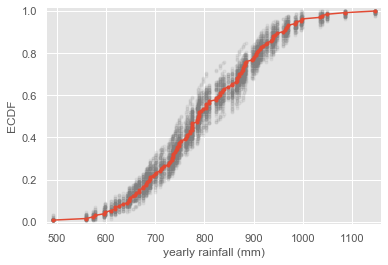

In [26]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

----

### Generating many bootstrap replicates

The function `bootstrap_replicate_1d()` from the video is available in your namespace. Now you'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the `bootstrap_replicate_1d()` function is provided below:

`def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))`

#### Instructions

- Define a function with call signature `draw_bs_reps(data, func, size=1)`.
    - Using `np.empty()`, initialize an array called `bs_replicates` of size `size` to hold all of the bootstrap replicates.
    - Write a `for` loop that ranges over `size` and computes a replicate using `bootstrap_replicate_1d()`. Refer to the exercise description above to see the function signature of `bootstrap_replicate_1d()`. Store the replicate in the appropriate index of `bs_replicates`.
    - Return the array of replicates `bs_replicates`. This has already been done for you.

In [27]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [28]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

----

### Bootstrap replicates of the mean and the SEM

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a *probabilistic* estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the **standard error of the mean**, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called `rainfall`.

#### Instructions

- Draw `10000` bootstrap replicates of the **mean** annual rainfall using your `draw_bs_reps()` function and the `rainfall` array. Hint: Pass in `np.mean` for `func` to compute the mean.
    - As a reminder, `draw_bs_reps()` accepts 3 arguments: `data`, `func`, and `size`.
- Compute and print the standard error of the mean of `rainfall`.
    - The formula to compute this is `np.std(data) / np.sqrt(len(data))`.
- Compute and print the standard deviation of your bootstrap replicates `bs_replicates`.
- Make a histogram of the replicates using the `normed=True` keyword argument and `50` bins.
- Hit 'Submit Answer' to see the plot!

10.51054915050619
10.465927071184412


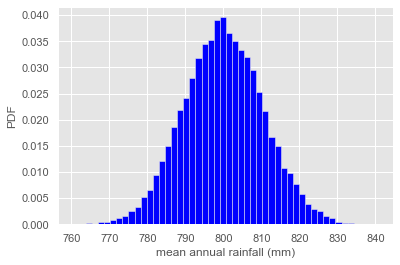

In [29]:
# set the seed
np.random.seed(42)

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True, color='blue')
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

----

### Confidence intervals of rainfall data

A *confidence interval* gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the `np.percentile()` function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as `bs_replicates`. What is the 95% confidence interval?

- (765, 776) mm/year
- **(780, 821) mm/year**
- (761, 817) mm/year
- (761, 841) mm/year

In [30]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.76992481, 820.95043233])

----

### Bootstrap replicates of other statistics

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the `draw_bs_reps()` function [you defined a few exercises ago](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6). It is provided below for your reference:

`def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])`

#### Instructions

- Draw `10000` bootstrap replicates of the **variance** in annual rainfall, stored in the `rainfall` dataset, using your `draw_bs_reps()` function. Hint: Pass in `np.var` for computing the variance.
- Divide your variance replicates (`bs_replicates`) by `100` to put the variance in units of square centimeters for convenience.
- Make a histogram of `bs_replicates` using the `normed=True` keyword argument and `50` bins.

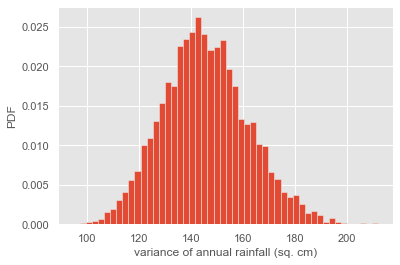

In [31]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This is **not normally distributed**, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using `np.percentile()` with your bootstrap replicates.

----

### Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter $τ$. Plot a histogram of your replicates and report a 95% confidence interval.

#### Instructions

- Generate `10000` bootstrap replicates of $τ$ from the `nohitter_times` data using your `draw_bs_reps()` function. Recall that the optimal $τ$ is calculated as the **mean** of the data.
- Compute the 95% confidence interval using `np.percentile()` and passing in two arguments: The array `bs_replicates`, and the list of percentiles - in this case `2.5` and `97.5`.
- Print the confidence interval.
- Plot a histogram of your bootstrap replicates. This has been done for you, so hit 'Submit Answer' to see the plot!

95% confidence interval = [664.31354582 871.36792829] games


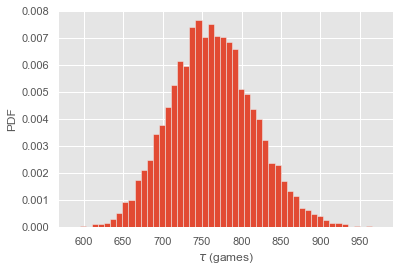

In [32]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, ([2.5, 97.5]))

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

<div class="alert alert-block alert-info">
<b>Note:</b> 

Do not forget to pass percentiles as a list into `np.percentile()`. Such as `np.percentile(bs_replicates, ([2.5, 97.5]))`
</div>

----

### A function to do pairs bootstrap

As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of `x,y` data.

#### Instructions

- Define a function with call signature `draw_bs_pairs_linreg(x, y, size=1)` to perform pairs bootstrap estimates on linear regression parameters.
    - Use `np.arange()` to set up an array of indices going from `0` to `len(x)`. These are what you will resample and use them to pick values out of the `x` and `y` arrays.
    - Use `np.empty()` to initialize the slope and intercept replicate arrays to be of size `size`.
    - Write a `for` loop to:
        - Resample the indices `inds`. Use `np.random.choice()` to do this.
        - Make new $x$ and $y$ arrays `bs_x` and `bs_y` using the the resampled indices `bs_inds`. To do this, slice `x` and `y` with `bs_inds`.
        - Use `np.polyfit()` on the new $x$ and $y$ arrays and store the computed slope and intercept.
    - Return the pair bootstrap replicates of the slope and intercept.

In [33]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

----

### Pairs bootstrap of literacy/fertility data

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays `illiteracy` and `fertility`.

As a reminder, `draw_bs_pairs_linreg()` has a function signature of `draw_bs_pairs_linreg(x, y, size=1)`, and it returns two values: `bs_slope_reps` and `bs_intercept_reps`.

#### Instructions

- Use your `draw_bs_pairs_linreg()` function to take `1000` bootstrap replicates of the slope and intercept. The x-axis data is `illiteracy` and y-axis data is `fertility`.
- Compute and print the 95% bootstrap confidence interval for the slope.
- Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click 'Submit Answer' to see your histogram!

[0.04378061 0.0551616 ]


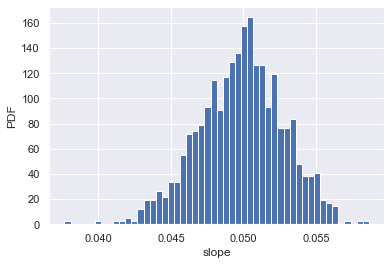

In [34]:
# set the seed and style
np.random.seed(42)
sns.set()

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

----

### Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as `bs_slope_reps` and `bs_intercept_reps`).

#### Instructions

- Generate an array of $x$ values consisting of `0` and `100` for the plot of the regression lines. Use the `np.array() ` function for this.
- Write a `for` loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for `100` lines.
    - When plotting the regression lines in each iteration of the `for` loop, recall the regression equation `y = a*x + b`. Here, `a` is `bs_slope_reps[i]` and `b` is `bs_intercept_reps[i]`.
    - Specify the keyword arguments `linewidth=0.5`, `alpha=0.2`, and `color='red'` in your call to `plt.plot()`.
- Make a scatter plot with `illiteracy` on the x-axis and `fertility` on the y-axis. Remember to specify the `marker='.'` and `linestyle='none'` keyword arguments.
- Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit 'Submit Answer' to visualize the bootstrap regressions!

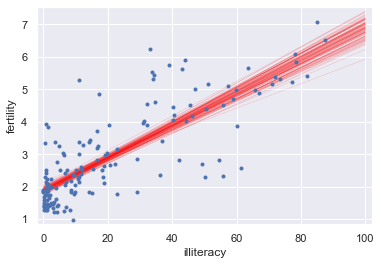

In [35]:
# set the seed and style
np.random.seed(42)
sns.set()

# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

----

# Chapter 3: Introduction to hypothesis testing

### Generating a permutation sample

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

#### Instructions

- Concatenate the two input arrays into one using `np.concatenate()`. Be sure to pass in `data1` and `data2` as one argument `(data1, data2)`.
- Use `np.random.permutation()` to permute the concatenated array.
- Store the first `len(data1)` entries of `permuted_data` as `perm_sample_1` and the last `len(data2)` entries of `permuted_data` as `perm_sample_2`. In practice, this can be achieved by using `:len(data1)` and `len(data1):` to slice `permuted_data`.
- Return `perm_sample_1` and `perm_sample_2`.

In [36]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2)) # it accepts tuple of arrays

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

----

### Visualizing permutation sampling

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs *would look* if they were identically distributed.

The data are stored in the Numpy arrays `rain_june` and `rain_november`.

As a reminder, `permutation_sample()` has a function signature of `permutation_sample(data_1, data_2)` with a return value of `permuted_data[:len(data_1)]`, `permuted_data[len(data_1):]`, where `permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))`.

#### Instructions

- Write a `for` loop to generate 50 permutation samples, compute their ECDFs, and plot them.
    - Generate a permutation sample pair from `rain_june` and `rain_november` using your `permutation_sample()` function.
    - Generate the `x` and `y` values for an ECDF for each of the two permutation samples for the ECDF using your `ecdf()` function.
    - Plot the ECDF of the first permutation sample (`x_1` and `y_1`) as dots. Do the same for the second permutation sample (`x_2` and `y_2`).
- Generate `x` and `y` values for ECDFs for the `rain_june` and `rain_november` data and plot the ECDFs using respectively the keyword arguments `color='red'` and `color='blue'`.
- Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit 'Submit Answer' to view the plot!

In [37]:
# remember the data
sheffield.head(2)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---


In [38]:
# prepare those arrays rain_june and rain_november
rain_june = sheffield[sheffield['mm']==6].rain.values
rain_november = sheffield[sheffield['mm']==11].rain.values

To get a **NumPy array** you can use `.values` attribute of dataframe after slicing.

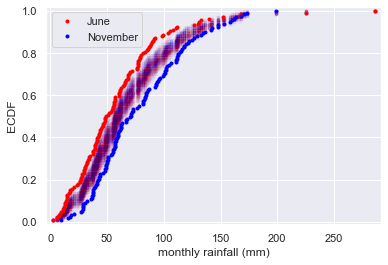

In [39]:
# set the seed and style
np.random.seed(42)
sns.set()

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='June')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label='November')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.legend()
plt.show()

**Notice that** the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that **the hypothesis is not commensurate with the data**. June and November rainfall are not identically distributed.

----

### Test statistics

When performing hypothesis tests, your choice of test statistic should be:

- something well-known, like the mean or median.
- be a parameter that can be estimated.
- **be pertinent to the question you are seeking to answer in your hypothesis test**.

### What is a p-value?

The p-value is generally a measure of:

- the probability that the hypothesis you are testing is true.
- the probability of observing your data if the hypothesis you are testing is true.
- __the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true__.

----

### Generating permutation replicates

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function [you wrote in chapter 2](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6) is useful for you to generate bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature `draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, `func` must be a function that takes two arrays as arguments. In most circumstances, `func` will be a function you write yourself.

#### Instructions

- Define a function with this signature: `draw_perm_reps(data_1, data_2, func, size=1)`.
    - Initialize an array to hold the permutation replicates `using np.empty()`.
    - Write a `for` loop to:
        - Compute a permutation sample using your `permutation_sample()` function
        - Pass the samples into `func()` to compute the replicate and store the result in your array of replicates.
- Return the array of replicates.

In [40]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

----

### Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (*Sci. Rep., 4, 5225, 2014*) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, `df`, where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).

#### Instructions

- Use `sns.swarmplot()` to make a bee swarm plot of the data by specifying the `x`, `y`, and `data` keyword arguments.
- Label your axes.
- Show the plot.

In [41]:
# import the dataset first
frog = pd.read_csv('data/frog_tongue.csv', skiprows=14)
frog.head(2)

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695


Frog A is `ID` II, where Frog B is `ID` IV.

In [42]:
# slice the dataframe only with IDs > II and IV
# and reset the index
df = frog[(frog.ID == 'II') | (frog.ID == 'IV')][['ID', 'impact force (mN)']].reset_index(drop=True)
df.columns = ['ID', 'impact_force']
df.head(2)

,ID,impact_force
0,II,1612
1,II,605


In [43]:
# convert columns as shown in the question
df.ID = df.ID.apply(lambda x: 'A' if x=='II' else 'B')

# divide with 1000 as shown in question.
df.impact_force = df.impact_force/1000
df.head()

,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327
3,A,0.946
4,A,0.541


It is ready now for analysis.

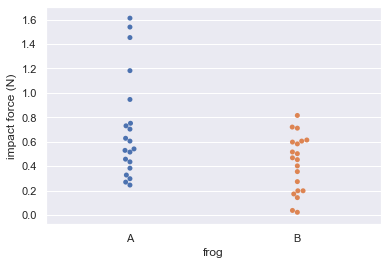

In [44]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. **Frog A**, the adult, has three or four very hard strikes, and **Frog B**, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

----

### Permutation test on frog data

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays `force_a` and `force_b`.

#### Instructions

- Define a function with call signature `diff_of_means(data_1, data_2)` that returns the differences in means between two data sets, mean of `data_1` minus mean of `data_2`.
- Use this function to compute the empirical difference of means that was observed in the frogs.
- Draw 10,000 permutation replicates of the difference of means.
- Compute the p-value.
- Print the p-value.

In [45]:
# prepare those arrays
force_a = df[df.ID=='A'].impact_force.values
force_b = df[df.ID=='B'].impact_force.values

In [46]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0063


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

----

### A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B *if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true*. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

#### Instructions

- Translate the impact forces of Frog B such that its mean is 0.55 N.
- Use your `draw_bs_reps()` function to take 10,000 bootstrap replicates of the mean of your translated forces.
- Compute the p-value by finding the fraction of your bootstrap replicates that are less than the observed mean impact force of Frog B. Note that the variable of interest here is `force_b`.
- Print your p-value.

In [47]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b + 0.55 - np.mean(force_b)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0046


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

----

### A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift *both* arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects `forces_concat` and `empirical_diff_means` are already in your namespace.

#### Instructions

- Compute the mean of all forces (from `forces_concat`) using `np.mean()`.
- Generate shifted data sets for both `force_a` and `force_b` such that the mean of each is the mean of the concatenated array of impact forces.
- Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays.
- Compute the bootstrap replicates of the difference of means by subtracting the replicates of the shifted impact force of Frog B from those of Frog A.
- Compute and print the p-value from your bootstrap replicates.

In [48]:
# forces_concat by concatenating
forces_concat = np.concatenate((force_a, force_b), axis=0)

In [49]:
# set the seed and style
np.random.seed(42)

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0043


__NOTE:__ You got a similar result as when you did the permutation test. Nonetheless, remember that it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or in the distribution of impact forces?

----

# Chapter 4: Hypothesis test examples

### The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the *Democrats* who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

#### Instructions

- Construct Boolean arrays, `dems` and `reps` that contain the votes of the respective parties; e.g., `dems` has 153 `True` entries and 91 `False` entries.
- Write a function, `frac_yea_dems(dems, reps)` that returns the fraction of Democrats that voted yea. The first input is an array of Booleans, Two inputs are required to use your `draw_perm_reps()` function, but the second is not used.
- Use your `draw_perm_reps()` function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.
- Compute and print the p-value.

In [50]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

# create a function
def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that **party identity had a lot to do with the voting**. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

----

### What is equivalent?

You have experience matching stories to probability distributions. Similarly, you use the same procedure for two different A/B tests if their stories match. In the Civil Rights Act example you just did, you performed an A/B test on voting data, which has a Yes/No type of outcome for each subject (in that case, a voter). Which of the following situations involving testing by a web-based company has an equivalent set up for an A/B test as the one you just did with the Civil Rights Act of 1964?

- You measure how much time each customer spends on your website before and after an advertising campaign.
- **You measure the number of people who click on an ad on your company's website before and after changing its color**.
- You measure how many clicks each person has on your company's website before and after changing the header layout.

----

### A time-on-website analog

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

Since you will be using your `draw_perm_reps()` function in this exercise, it may be useful to remind yourself of its call signature: `draw_perm_reps(d1, d2, func, size=1)` or even [referring back](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=7) to the chapter 3 exercise in which you defined it.

#### Instructions

- Compute the observed difference in mean inter-nohitter time using `diff_of_means()`.
- Generate 10,000 permutation replicates of the difference of means using `draw_perm_reps()`.
- Compute and print the p-value.

In [51]:
# read the data
mlb = pd.read_csv('data/mlb_nohitters.csv', index_col='date', parse_dates=True)
mlb.head()

,game_number,winning_team,losing_team,winning_pitcher
date,,,,
1876-07-15,140,NaN,NaN,NaN
1880-06-12,1035,NaN,NaN,NaN
1880-06-17,1046,NaN,NaN,NaN
1880-08-19,1177,NaN,NaN,NaN
1880-08-20,1179,NaN,NaN,NaN


In [52]:
# prepare those differences by creating a new column
mlb['no_hitters'] = mlb.game_number.diff()-1

# fix the first NaN value
mlb.iloc[0,-1] = -1
mlb.head()

,game_number,winning_team,losing_team,winning_pitcher,no_hitters
date,,,,,
1876-07-15,140,NaN,NaN,NaN,-1.0
1880-06-12,1035,NaN,NaN,NaN,894.0
1880-06-17,1046,NaN,NaN,NaN,10.0
1880-08-19,1177,NaN,NaN,NaN,130.0
1880-08-20,1179,NaN,NaN,NaN,1.0


In [53]:
# now separate values to create before 1920 after 1920
nht_dead = mlb.loc[:'1919'].no_hitters.values
nht_live = mlb.loc['1920':].no_hitters.values

In [54]:
# set the seed
np.random.seed(42)

# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val ='.format('.3f'), p)

p-val = 0.0001


Your p-value is **0.0001**, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

----

### Simulating a null hypothesis concerning correlation

The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this null hypothesis in the next exercise.

To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices, which is the best way to do it?

- Choose 162 random numbers to represent the illiteracy rate and 162 random numbers to represent the corresponding fertility rate.
- Do a pairs bootstrap: Sample pairs of observed data with replacement to generate a new set of (illiteracy, fertility) data.
- Do a bootstrap sampling in which you sample 162 illiteracy values with replacement and then 162 fertility values with replacement.
- **Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data**.
- Do a permutation test: Permute both the illiteracy and fertility values to generate a new set of (illiteracy, fertility data).

<div class="alert alert-block alert-info">
<b>Note:</b> 

Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs to which fertility value is shuffled.
</div>

----

### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

The function `pearson_r()` that you [wrote in the prequel to this course](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15) for computing the Pearson correlation coefficient is already in your name space.

#### Instructions

- Compute the observed Pearson correlation between `illiteracy` and `fertility`.
- Initialize an array to store your permutation replicates.
- Write a `for` loop to draw 10,000 replicates:
    - Permute the `illiteracy` measurements using `np.random.permutation()`.
    - Compute the Pearson correlation between the permuted illiteracy array, `illiteracy_permuted`, and `fertility`.
- Compute and print the p-value from the replicates.

In [55]:
# create pearson_r function
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [56]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates>=r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your *p-value is very low*, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

----

### Do neonicotinoid insecticides have unintended consequences?

As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. ([Proc. Roy. Soc. B, 2016](http://dx.doi.org/10.1098/rspb.2016.0506)) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array `control`) and bees treated with pesticide (stored in the Numpy array `treated`).

#### Instructions

- Use your `ecdf()` function to generate `x,y` values from the `control` and `treated` arrays for plotting the ECDFs.
- Plot the ECDFs on the same plot.
- The margins have been set for you, along with the legend and axis labels. Hit 'Submit Answer' to see the result!

In [57]:
# import the dataset
bee = pd.read_csv('data/bee_sperm.csv', skiprows=3)
bee.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [58]:
treated = bee[bee.Treatment=='Pesticide']['Alive Sperm Millions'].values
control = bee[bee.Treatment=='Control']['Alive Sperm Millions'].values

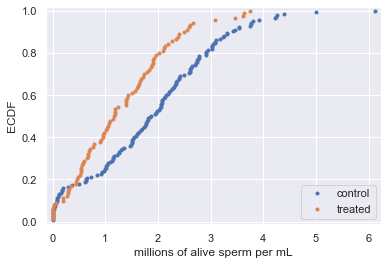

In [59]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

----

### Bootstrap hypothesis test on bee sperm counts

Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

For your reference, the call signature for the `draw_bs_reps()` function [you wrote in chapter 2](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6) is `draw_bs_reps(data, func, size=1)`.

#### Instructions

- Compute the mean alive sperm count of `control` minus that of `treated`.
- Compute the mean of all alive sperm counts. To do this, first concatenate `control` and `treated` and take the mean of the concatenated array.
- Generate shifted data sets for both `control` and `treated` such that the shifted data sets have the same mean. This has already been done for you.
- Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays. Use your `draw_bs_reps()` function.
- Compute the bootstrap replicates of the difference of means.
- The code to compute and print the p-value has been written for you. Hit 'Submit Answer' to see the result!

In [60]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0001


Nice work! The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. In fact, when I did the calculation with 10 million replicates, I got a p-value of 2e-05.

----

# Chapter 5: Putting it all together: a case study

### EDA of beak depths of Darwin's finches

For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species *Geospiza scandens* has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, *Geospiza fortis*. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of *G. scandens* on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called `df` with columns `'year'` and `'beak_depth'`. The units of beak depth are millimeters (mm).

#### Instructions

- Create the beeswarm plot.
- Label the axes.
- Show the plot.

In [97]:
# import the datasets
# they are separate at first
df_1975 = pd.read_csv('data/finch_beaks_1975.csv')

# keep only scandens
df_1975 = df_1975[df_1975['species']=='scandens']

# drop other columns
df_1975.drop(['band', 'species'], axis=1, inplace=True)

# rename column names
df_1975.rename(columns={'Beak depth, mm': 'beak_depth', 'Beak length, mm': 'beak_length'}, inplace=True)
df_1975['year'] = 1975
df_1975.reset_index(inplace=True, drop=True)
df_1975.head(2)

,beak_length,beak_depth,year
0,13.9,8.4,1975
1,14.0,8.8,1975


In [98]:
df_2012 = pd.read_csv('data/finch_beaks_2012.csv')

# keep only scandens
df_2012 = df_2012[df_2012['species']=='scandens']

# drop other columns
df_2012.drop(['band', 'species'], axis=1, inplace=True)

# rename column names
df_2012.rename(columns={'bdepth': 'beak_depth', 'blength': 'beak_length'}, inplace=True)
df_2012['year'] = 2012
df_2012.reset_index(inplace=True, drop=True)
df_2012.head(2)

,beak_length,beak_depth,year
0,14.3,9.4,2012
1,12.5,8.9,2012


In [99]:
# finally append them
df = df_1975.append(df_2012)
df.head()

,beak_length,beak_depth,year
0,13.9,8.4,1975
1,14.0,8.8,1975
2,12.9,8.4,1975
3,13.5,8.0,1975
4,12.9,7.9,1975


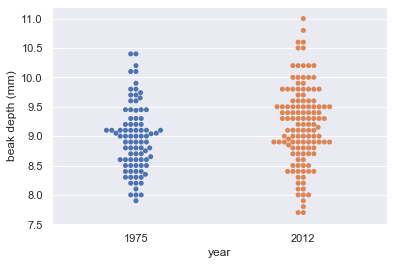

In [89]:
# Create bee swarm plot
_ = sns.swarmplot('year', 'beak_depth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the **mean of the 2012** data set might be slightly higher, and it might have a bigger **variance**.

----

### ECDFs of beak depths

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

For your convenience, the beak depths for the respective years has been stored in the NumPy arrays `bd_1975` and `bd_2012`.

#### Instructions

- Compute the ECDF for the 1975 and 2012 data.
- Plot the two ECDFs.
- Set a 2% margin and add axis labels and a legend to the plot.
- Hit 'Submit Answer' to view the plot!

In [91]:
# prepare those arrays.
bd_1975 = df[df.year==1975].beak_depth.values
bd_2012 = df[df.year==2012].beak_depth.values

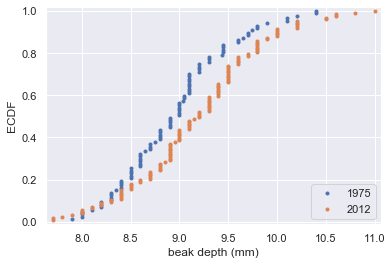

In [92]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

----

### Parameter estimates of beak depths

Estimate the *difference* of the mean beak depth of the *G. scandens* samples from 1975 and 2012 and report a 95% confidence interval.

Since in this exercise you will use the `draw_bs_reps()` function you wrote in chapter 2, it may be helpful to [refer back to it](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6).

#### Instructions

- Compute the difference of the sample means.
- Take 10,000 bootstrap replicates of the mean for the 1975 beak depths using your `draw_bs_reps()` function. Also get 10,000 bootstrap replicates of the mean for the 2012 beak depths.
- Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference of means.
- Use the replicates to compute the 95% confidence interval.
- Hit 'Submit Answer' to view the results!

In [93]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06284157 0.3886799 ] mm


----

### Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of *G. scandens* on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

#### Instructions

- Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.
- Shift `bd_1975` and `bd_2012` such that their means are equal to the one you just computed for the combined data set.
- Take 10,000 bootstrap replicates of the mean each for the 1975 and 2012 beak depths.
- Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference.
- Compute and print the p-value. The observed difference in means you computed in the last exercise is still in your namespace as `mean_diff`.

In [95]:
# set the seed
np.random.seed(42)

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0034


We get a p-value of **0.0034**, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of **0.2** mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

----

### EDA of beak length and depth

The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). You still have the beak depth data stored in `bd_1975` and `bd_2012`. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

#### Instructions

- Make a scatter plot of the 1975 data. Use the `color='blue'` keyword argument. Also use an `alpha=0.5` keyword argument to have transparency in case data points overlap.
- Do the same for the 2012 data, but use the `color='red'` keyword argument.
- Add a legend and label the axes.
- Show your plot.

In [100]:
# prepare those arrays.
bl_1975 = df[df.year==1975].beak_length.values
bl_2012 = df[df.year==2012].beak_length.values

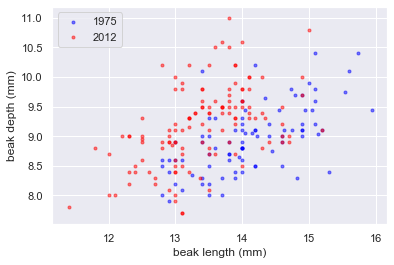

In [101]:
# Make scatter plot of 1975 data
_ = plt.scatter(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.scatter(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

----

### Linear regressions

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

You will use the `draw_bs_pairs_linreg()` function you [wrote back in chapter 2](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=12).

As a reminder, its call signature is `draw_bs_pairs_linreg(x, y, size=1)`, and it returns `bs_slope_reps` and `bs_intercept_reps`. The beak length data are stored as `bl_1975` and `bl_2012`, and the beak depth data is stored in `bd_1975` and `bd_2012`.

#### Instructions

- Compute the slope and intercept for both the 1975 and 2012 data sets.
- Obtain 1000 pairs bootstrap samples for the linear regressions using your `draw_bs_pairs_linreg()` function.
- Compute 95% confidence intervals for the slopes and the intercepts.

In [102]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605936 conf int = [0.33204478 0.59449384]
1975: intercept = 2.390875236584226 conf int = [0.58355792 4.31190024]
2012: slope = 0.4626303588353129 conf int = [0.33186804 0.60236634]
2012: intercept = 2.9772474982360158 conf int = [1.09485964 4.76711109]


----

### Displaying the linear regression results

Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. To do this, take the first 100 bootstrap samples (stored in `bs_slope_reps_1975`, `bs_intercept_reps_1975`, `bs_slope_reps_2012`, and `bs_intercept_reps_2012`) and plot the lines with `alpha=0.2` and `linewidth=0.5` keyword arguments to `plt.plot()`.

#### Instructions

- Generate the $x$-values for the bootstrap lines using `np.array()`. They should consist of 10 mm and 17 mm.
- Write a `for` loop to plot 100 of the bootstrap lines for the 1975 and 2012 data sets. The lines for the 1975 data set should be `'blue'` and those for the 2012 data set should be `'red'`.
- Hit 'Submit Answer' to view the plot!

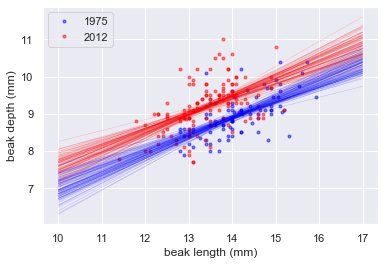

In [103]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

----

### Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

Remember, the data are stored in `bd_1975`, `bd_2012`, `bl_1975`, and `bl_2012`.

#### Instructions

- Make arrays of the beak length to depth ratio of each bird for 1975 and for 2012.
- Compute the mean of the length to depth ratio for 1975 and for 2012.
- Generate 10,000 bootstrap replicates each for the mean ratio for 1975 and 2012 using your `draw_bs_reps()` function.
- Get a **99%** bootstrap confidence interval for the length to depth ratio for 1975 and 2012.
- Print the results.

In [104]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55684007 1.60131071]
2012: mean ratio = 1.4658342276847767 conf int = [1.44411705 1.48750423]


----

### How different is the ratio?

In the previous exercise, you computed the mean beak length to depth ratio with 99% confidence intervals for 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem. In addition to these results, what would you say about the ratio of beak length to depth?

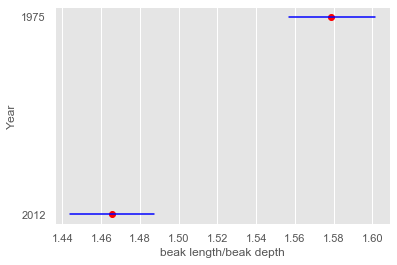

In [124]:
plt.style.use('ggplot')
plt.errorbar(conf_int_1975, y=1975, color='blue')
plt.errorbar(conf_int_2012, y=2012, color='blue')
plt.yticks([1975, 2012])
plt.gca().invert_yaxis()
plt.plot(mean_ratio_1975, 1975, marker='o', markersize=6, color='red')
plt.plot(mean_ratio_2012, 2012, marker='o', markersize=6, color='red')
plt.ylabel('Year')
plt.grid(False, axis='y')
plt.xlabel('beak length/beak depth')
plt.show()

**Answer:** The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

----

### EDA of heritability

The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species `G. scandens`. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from *G. fortis* birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the `alpha=0.5` keyword argument to help you see overlapping points.

#### Instructions

- Generate scatter plots for both species. Display the data for *G. fortis* in blue and *G. scandens* in red.
- Set the axis labels, make a legend, and show the plot.

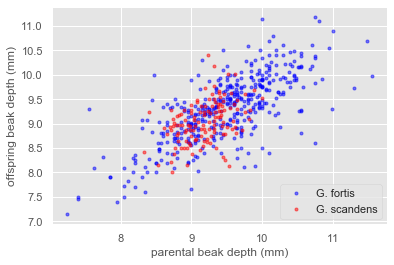

In [140]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in *G. fortis* than in *G. scandens*. This suggests that beak depth is more strongly inherited in *G. fortis*. We'll quantify this correlation next.

----

### Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have [already written](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=12) a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on pairs samples defined. The statistic of interest is computed by calling `func(bs_x, bs_y)`. In the next exercise, you will use `pearson_r` for `func`.

#### Instructions

- Set up an array of indices to sample from. (Remember, when doing pairs bootstrap, we randomly choose indices and use those to get the pairs.)
- Initialize the array of bootstrap replicates. This should be a one-dimensional array of length `size`.
- Write a `for` loop to draw the samples.
- Randomly choose indices from the array of indices you previously set up.
- Extract `x` values and `y` values from the input array using the indices you just chose to generate a bootstrap sample.
- Use `func` to compute the statistic of interest from the bootstrap samples of `x` and `y` and store it in your array of bootstrap replicates.
- Return the array of bootstrap replicates.

In [141]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

----

### Pearson correlation of offspring and parental data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for *G. scandens*. Do the same for *G. fortis*. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

Remember, the data are stored in `bd_parent_scandens`, `bd_offspring_scandens`, `bd_parent_fortis`, and `bd_offspring_fortis`.

#### Instructions

- Use the `pearson_r()` function [you wrote in the prequel to this course](https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15) to compute the Pearson correlation coefficient for *G. scandens* and *G. fortis*.
- Acquire 1000 pairs bootstrap replicates of the Pearson correlation coefficient using the `draw_bs_pairs()` function you wrote in the previous exercise for *G. scandens* and *G. fortis*.
- Compute the 95% confidence interval for both using your bootstrap replicates.

In [142]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401259 [0.26899984 0.55155084]
G. fortis: 0.7283412395518486 [0.6762319  0.78173397]


It is clear from the confidence intervals that beak depth of the offspring of *G. fortis* parents is more strongly correlated with their offspring than their *G. scandens* counterparts.

----

### Measuring heritability

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the *variance* of the *parents* alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

Remember, the data are stored in `bd_parent_scandens`, `bd_offspring_scandens`, `bd_parent_fortis`, and `bd_offspring_fortis`.

#### Instructions

- Write a function `heritability(parents, offspring)` that computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. Hint: Remind yourself of the `np.cov()` function we covered in the prequel to this course.
- Use this function to compute the heritability for *G. scandens* and *G. fortis*.
- Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap for *G. scandens* and *G. fortis*.
- Compute the 95% confidence interval for both using your bootstrap replicates.
- Print the results.

In [143]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685983 [0.34775708 0.73013368]
G. fortis: 0.7229051911438154 [0.64975447 0.80061744]


Here again, we see that *G. fortis* has stronger heritability than *G. scandens*. This suggests that the traits of *G. fortis* may be strongly incorporated into *G. scandens* by introgressive hybridization.

----

### Is beak depth heritable at all in G. scandens?

The heritability of beak depth in *G. scandens* seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

#### Instructions

- Initialize your array of replicates of heritability. We will take 10,000 pairs permutation replicates.
- Write a `for` loop to generate your replicates.
    - Permute the `bd_parent_scandens` array using `np.random.permutation()`.
    - Compute the heritability between the permuted array and the `bd_offspring_scandens` array using the `heritability()` function you wrote in the last exercise. Store the result in the replicates array.
- Compute the p-value as the number of replicates that are greater than the observed `heritability_scandens` you computed in the last exercise.

In [144]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


You get a **p-value of zero**, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in *G. scandens*, just not as much as in *G. fortis*. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.